# Pre-processing, Modeling, Predicting using Production Model

## 1. Pre-processing

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures 

import statsmodels.api as sm
from scipy import stats
import math


In [2]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [3]:
housing = pd.read_csv('../datasets/housing3.csv', low_memory=False)
housing.head()

,Unnamed: 0,id,flat_type,flat_model,resale_price,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,sec_sch_nearest_dist,sec_sch_name,resale_price_log,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,0,88471,4 ROOM,Model A,680000.0,2016,6.876017,N,Kallang,6.997679,1.945910,2.564949,4.430817,5.799344,3.381926,7.037584,Geylang Methodist School,7.037584,Geylang Methodist School,13.429848,1.261663,0.0,4.955827,2.397895,2.302585
1,1,122598,5 ROOM,Improved,665000.0,2012,7.243742,N,Bishan,6.764971,1.098612,1.945910,4.382027,6.806453,4.064019,6.029741,Kuo Chuan Presbyterian Primary School,6.104557,Kuo Chuan Presbyterian Secondary School,13.407542,0.851318,0.0,4.718499,2.079442,3.218876
2,2,170897,EXECUTIVE,Apartment,838000.0,2013,7.346021,N,Bukit Batok,7.285904,1.386294,0.000000,4.430817,7.196126,5.369465,6.212304,Keming Primary School,5.193371,Yusof Ishak Secondary School,13.638773,2.227732,0.0,4.499810,2.639057,2.772589
3,3,86070,4 ROOM,Model A,550000.0,2012,7.010936,Y,Bishan,6.856646,1.386294,2.197225,3.465736,6.810642,3.770379,5.964904,Catholic High School,5.964904,Catholic High School,13.217674,0.799040,0.0,4.317488,1.098612,2.995732
4,4,153632,4 ROOM,Simplified,298000.0,2017,6.795048,N,Yishun,6.592732,0.693147,0.000000,3.806662,6.021856,4.863084,5.994462,Naval Base Primary School,5.743085,Orchid Park Secondary School,12.604849,1.328843,0.0,3.871201,0.693147,3.401197


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 150634 non-null  int64  
 1   id                         150634 non-null  int64  
 2   flat_type                  150634 non-null  object 
 3   flat_model                 150634 non-null  object 
 4   resale_price               150634 non-null  float64
 5   Tranc_Year                 150634 non-null  int64  
 6   floor_area_sqft            150634 non-null  float64
 7   commercial                 150634 non-null  object 
 8   planning_area              150634 non-null  object 
 9   Mall_Nearest_Distance      150634 non-null  float64
 10  Mall_Within_2km            150634 non-null  float64
 11  Hawker_Within_2km          150634 non-null  float64
 12  hawker_food_stalls         150634 non-null  float64
 13  mrt_nearest_distance       15

In [5]:
# Converting the following variables to categorical 

housing['Tranc_Year'] = housing['Tranc_Year'].astype('object')
housing['id'] = housing['id'].astype('object')
id_no = housing['id'].astype('object')

In [6]:
# Identifying categorical predictors for one-hot encoding

numerical_var = housing.select_dtypes(include=['number'])
numerical_var.columns

Index(['Unnamed: 0', 'resale_price', 'floor_area_sqft',
       'Mall_Nearest_Distance', 'Mall_Within_2km', 'Hawker_Within_2km',
       'hawker_food_stalls', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'resale_price_log', 'distance_from_CBD',
       '1_2_3_rooms_sold', '4_5_other_rooms_sold', 'est_floor_level',
       'age_at_sale'],
      dtype='object')

In [7]:
numerical_var.drop(columns = ['resale_price','resale_price_log'], inplace = True)

In [8]:
# Standardising predictors

ss = StandardScaler()
num_ss = ss.fit_transform(numerical_var)
num_ss = pd.DataFrame(num_ss, columns = numerical_var.columns)

### Pre-Processing

In [9]:
# Identifying categorical predictors for one-hot encoding

categorical_var = housing.select_dtypes(include=['object'])
categorical_var.drop(columns = 'id', inplace = True)

In [10]:
# Dummifying all categorical variables

categorical_var = pd.get_dummies(columns=categorical_var.columns,data=housing, drop_first=True)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_25568/1831883889.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  categorical_var = pd.get_dummies(columns=categorical_var.columns,data=housing, drop_first=True)


In [11]:
housing = pd.concat([num_ss, categorical_var], axis=1)

In [12]:
housing.head()

,Unnamed: 0,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,Unnamed: 0,id,resale_price,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,resale_price_log,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Tranc_Year_2013,Tranc_Year_2014,Tranc_Year_2015,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,commercial_Y,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_

In [13]:
housing.drop(columns = "Unnamed: 0", inplace = True)

In [14]:
housing.head()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,id,resale_price,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,resale_price_log,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Tranc_Year_2013,Tranc_Year_2014,Tranc_Year_2015,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,commercial_Y,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,p

In [15]:
housing.describe(include = 'all')

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,id,resale_price,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,resale_price_log,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Tranc_Year_2013,Tranc_Year_2014,Tranc_Year_2015,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,commercial_Y,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,p

In [16]:
housing.shape

(150634, 406)

### Train Test Split

In [17]:
# Identifying X and y variables

X = housing.drop(columns = ['resale_price','resale_price_log','id'])
y = housing['resale_price_log']
y_orig = housing['resale_price']
id_no = housing['id']

In [18]:
X.head()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Tranc_Year_2013,Tranc_Year_2014,Tranc_Year_2015,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,commercial_Y,planning_area_Bedok,planning_area_Bishan,planning_area_Bukit Batok,planning_area_Bukit Merah,planning_area_Bukit Panjang,planning_area_Bukit Timah,planning_area_Changi,planning_area_Choa Chu Kang,planning_area_Clementi,planning_area_Downtown Core,planning_area_Geylang,planning_area_Hougang,planning_area_Jurong East,planning_area_Jurong West,planning_area_Kallang,planning_area_Marine Parade,planning_area_Novena,planning_area_Outram,planning_area_Pasir Ris,planning_area_Punggol,planning_area_Queenstown,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun,pri_sch_name_Ahmad Ibrahim Primary School,pri_sch_name_Ai Tong School,pri_sch_name_Alexandra Primary School,pri_sch_name_Anchor Green Primary School,pri_sch_name_Anderson Primary School,pri_sch_name_Ang Mo Kio Primary School,pri_sch_name_Angsana Primary School,pri_sch_name_Beacon Primary School,pri_sch_name_Bedok Green Primary School,pri_sch_name_Bendemeer Primary School,pri_sch_name_Blangah Rise Primary School,pri_sch_name_Boon Lay Garden Primary School,pri_sch_name_Bukit Panjang Primary School,pri_sch_name_Bukit View Primary School,pri_sch_name_CHIJ,pri_sch_name_CHIJ Our Lady Queen of Peace,pri_sch_name_CHIJ Our Lady of Good Counsel,pri_sch_name_CHIJ Our Lady of The Nativity,pri_sch_name_CHIJ Primary,pri_sch_name_CHIJ Saint Nicholas Girls' School,pri_sch_name_Canberra Primary School,pri_sch_name_Canossa Catholic Primary School,pri_sch_name_Cantonment Primary School,pri_sch_name_Casuarina Primary School,pri_sch_name_Catholic High School,pri_sch_name_Cedar Primary School,pri_sch_name_Changkat Primary School,pri_sch_name_Chongfu School,pri_sch_name_Chongzheng Primary School,pri_sch_name_Chua Chu Kang Primary School,pri_sch_name_Clementi Primary School,pri_sch_name_Compassvale Primary School,pri_sch_name_Concord Primary School,pri_sch_name_Corporation Primary School,pri_sch_name_Damai Primary School,pri_sch_name_Dazhong Primary School,pri_sch_name_De La Salle School,pri_sch_name_East Spring Primary School,pri_sch_name_Edgefield Primary School,pri_sch_name_Elias Park Primary School,pri_sch_name_Endeavour Primary School,pri_sch_name_Eunos Primary School,pri_sch_name_Evergreen Primary School,pri_sch_name_Fairfield Methodist School,pri_sch_name_Farrer Park Primary School,pri_sch_name_Fengshan Primary School,pri_sch_name_Fern Green Primary School,pri_sch_name_Fernvale Primary School,pri_sch_name_First Toa Payoh Primary School,pri_sch_name_Frontier Primary School,pri_sch_name_Fuchun Primary School,pri_sch_name_Fuhua Primary School,pri_sch_name_Gan Eng Seng Primary 

In [19]:
# Train-test-split (log)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [20]:
# Train-test-split (not log)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X,
    y_orig,
    test_size=0.3,
    random_state=42
)

## 2. Modeling

### Baseline Score

In [21]:
# Mean resale price 

mean = np.mean(y_train_orig)
mean

449677.8676110316

In [22]:
# Baseline model RMSE

pred = [mean for x in y_train_orig]
baseline_rmse = np.sqrt(np.mean((pred-y_train_orig)**2))
print(f'Baseline RMSE: {baseline_rmse}')

Baseline RMSE: 143665.13892789112


### Linear Regression

In [23]:
# Instantiating logistic regression model

lr_model = LinearRegression()

In [24]:
# Fitting
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
# Returning the R^2 for the model

#Training set R2
print('Training set R^2: ', lr_model.score(X_train, y_train))

#Test set R2
print('Test set R^2: ', lr_model.score(X_test, y_test))

Training set R^2:  0.9266306869654406
Test set R^2:  0.9251296397159545


In [26]:
# Cross validation

lr_model_scores = cross_val_score(lr_model, X_train, y_train, cv=10)

print (lr_model_scores)
print (np.mean(lr_model_scores))

[0.92582886 0.92519385 0.92828555 0.92537932 0.9255089  0.9277625
 0.92500798 0.92423375 0.92724629 0.92540488]
0.925985186898983


In [27]:
# Summary results with p-value 

X_train_lr = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_lr).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       resale_price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3531.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:22:40   Log-Likelihood:             1.1322e+05
No. Observations:              105443   AIC:                        -2.257e+05
Df Residuals:                  105074   BIC:                        -2.222e+05
Df Model:                         368                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                    -1.17e+07   1.91e+07     -0.612      0.540   -4.92e+07    2.58e+07
floor_area_sqft                                         -1.024e+08   5.25e+07     -1.951      0.051   -2.05e+08    4.62e+05
Mall_Nearest_Distance                                    4.075e+07   3.76e+07      1.084      0.278   -3.29e+07    1.14e+08
Mall_Within_2km                                          1.463e+07   4.39e+07      0.333      0.739   -7.14e+07    1.01e+08
Hawker_Within_2km                                        2.485e+07   1.65e+07      1.510      0.131   -7.41e+06    5.71e+07
hawker_food_stalls                                      -5.317e+06   7.97e+07     -0.067      0.947   -1.62e+08    1.51e+08
mrt_nearest_distance                                     2.513e+07   5.07e+07      0.496      0.620   -7.42e+07    1.24e+08
bus_stop_nearest_distance                                2.074e+07   4.79e+07      0.433      0.665   -7.32e+07    1.15e+08
pri_sch_nearest_distance                                 3.729e+07   4.87e+07      0.766      0.444   -5.81e+07    1.33e+08
sec_sch_nearest_dist                                     2.617e+07   4.01e+07      0.653      0.514   -5.24e+07    1.05e+08
distance_from_CBD                                        1.311e+07   9.92e+06      1.321      0.187   -6.34e+06    3.26e+07
1_2_3_rooms_sold                                         1.892e+09   2.04e+09      0.929      0.353    -2.1e+09    5.88e+09
4_5_other_rooms_sold                                    -1.586e+08    1.2e+08     -1.324      0.186   -3.93e+08    7.62e+07
est_floor_level                                          -7.96e+06   1.53e+07     -0.521      0.603   -3.79e+07     2.2e+07
age_at_sale                                              5.141e+07   1.32e+08      0.388      0.698   -2.08e+08    3.11e+08
floor_area_sqft                                          3.935e+08   2.02e+08      1.951      0.051   -1.78e+06    7.89e+08
Mall_Nearest_Distance                                   -6.646e+07   6.13e+07     -1.084      0.278   -1.87e+08    5.37e+07
Mall_Within_2km                                         -2.891e+07   8.68e+07     -0.333      0.739   -1.99e+08    1.41e+08
Hawker_Within_2km                                        -2.67e+07   1.77e+07     -1.510      0.131   -6.13e+07    7.96e+06
hawker_food_stalls                                       1.083e+07   1.62e+08      0.067      0.947   -3.07e+08    3.29e+08
mrt_nearest_distance                                    -4.185e+07   8.44e+07     -0.496      0.620   -2.07e+08    1.24e+08
bus_stop_nearest_distance                               -3.978e+07   9.19e+07     -0.433      0.665    -2.2

In [28]:
# Predictions using LR
lr_y_pred = lr_model.predict(X_test)

In [29]:
r_sq_score = lr_model.score(X_train, y_train)
print('R-Squared Score:', r_sq_score)

R-Squared Score: 0.9266306869654406


In [30]:
# MAE (the average of the absolute values of the errors) using log scale

print("Linear Regression Mean Absolute Error:", mean_absolute_error(np.exp(y_test),np.exp(lr_y_pred)))

Linear Regression Mean Absolute Error: 28959.965585295187


In [31]:
# RMSE using log scale

print("Linear Regression Root Mean Squared Error:", np.sqrt(mean_squared_error((y_test),lr_y_pred)))

Linear Regression Root Mean Squared Error: 0.08256358658568466


In [32]:
# Calculating the RMSE using original scale

print("Linear Regression Root Mean Squared Error:", np.sqrt(mean_squared_error(np.exp(y_test),np.exp(lr_y_pred))))

Linear Regression Root Mean Squared Error: 40522.52877196868


Text(0.5, 1.0, 'Linear Regression Predictions of Sale Price vs Actual Sale Price')

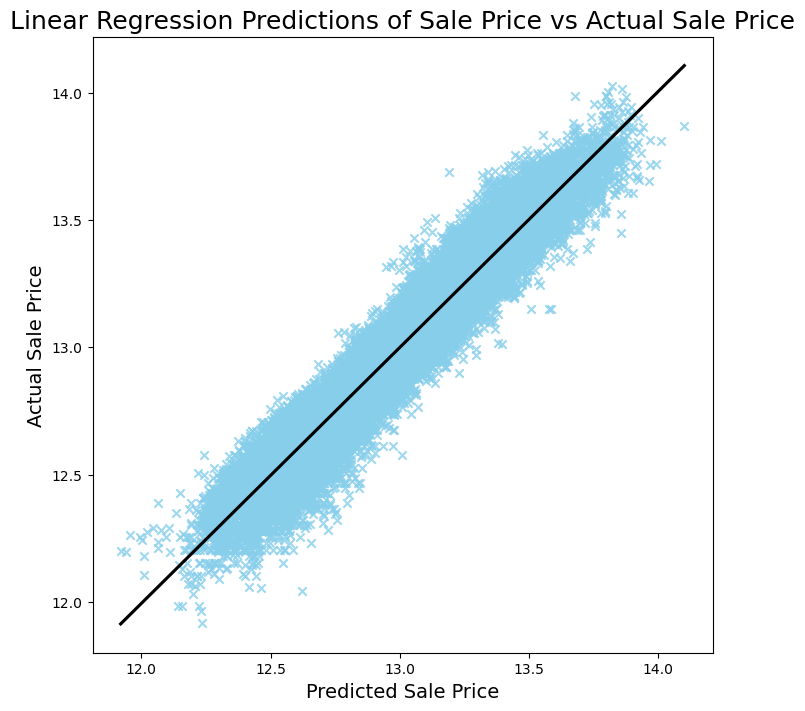

In [33]:
# Create scatterplot to show predicted values versus actual values for linearity check

plt.figure(figsize=(8,8))
sns.regplot(data=X_train, x=lr_y_pred, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Linear Regression Predictions of Sale Price vs Actual Sale Price', fontsize=18)

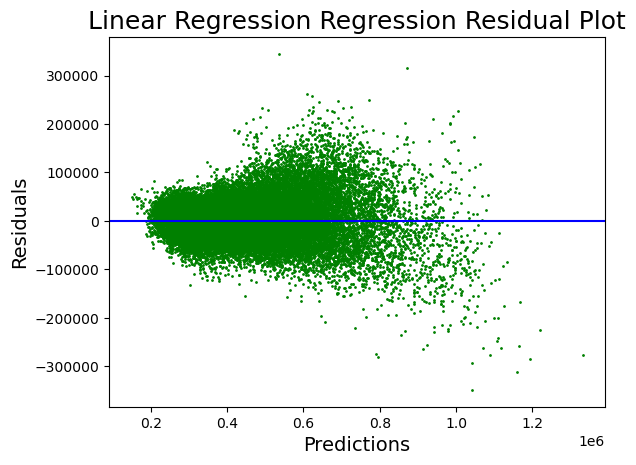

In [34]:
# Residual vs fits plot to detect non-linearity, unequal error variances, and outliers
# Looks fairly linear, variances of error terms are somewhat equal but there are quite a lot of outliers 

ols_residuals = np.exp(y_test) - np.exp(lr_y_pred)
plt.scatter(np.exp(lr_y_pred), ols_residuals, s=1, color='green')
plt.axhline(0, color="blue")
plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.title('Linear Regression Regression Residual Plot', fontsize=18)
plt.show()

### Ridge Regression

In [35]:
# finding the optimal alpha 

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

1.0


In [36]:
# fitting to the model and getting R^2 scores

ridge = Ridge(alpha = optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 10)

print ('Cross-Validation scores:', ridge_scores)
print ('Mean Cross-Validation score:', np.mean(ridge_scores))

Cross-Validation scores: [0.92584682 0.92525962 0.92824213 0.92534445 0.92556004 0.92783848
 0.92504722 0.92430961 0.92735118 0.92543918]
Mean Cross-Validation score: 0.926023872761516


In [37]:
ridge.fit(X_train, y_train)

Ridge()

In [38]:
print("Training score:", ridge.score(X_train, y_train))
print("Test score:", ridge.score(X_test, y_test))

Training score: 0.926665028414219
Test score: 0.925180572194181


In [39]:
# Predictions using Ridge
ridge_y_pred = ridge.predict(X_test)
pd.DataFrame(ridge_y_pred).head()

,0
0,12.874296
1,13.140380
2,13.656640
3,12.877729
4,13.131558


In [40]:
# MAE (the average of the absolute values of the errors) using log scale

print("Ridge Regression Mean Absolute Error:", mean_absolute_error(np.exp(y_test),np.exp(ridge_y_pred)))

Ridge Regression Mean Absolute Error: 28922.26694183781


In [41]:
# RMSE using log scale

print("Ridge Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ridge_y_pred)))

Ridge Root Mean Squared Error: 0.08253549881188622


In [42]:
# Converting RMSE to original scale

print("Ridge Model Root Mean Squared Error:", np.sqrt(mean_squared_error(np.exp(y_test),np.exp(ridge_y_pred))))

Ridge Model Root Mean Squared Error: 40485.501401073954


In [43]:
# R-Squared

print("R-Squared:", metrics.r2_score(y_test, ridge_y_pred))

R-Squared: 0.925180572194181


In [44]:
# Function for getting dollar increase in resale price for 1 unit change in predictor 

def coef_fx(model):
    transformed_coef = []
    for i in model.coef_:
        j = math.exp(i)
        transformed_coef.append(j)
        coef_effect = [(i-1)*housing['resale_price'].mean() for i in transformed_coef]
    return coef_effect

In [45]:
coef_fx(ridge)[:5]

[81007.76154397568,
 -4237.679268083364,
 -519.821638692709,
 6302.914812838614,
 -774.8711168838473]

In [46]:
# Summarising coefficients

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_),
                            'coef_effect':coef_fx(ridge),
                           })

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
ridge_coefs.head(50)

,variable,coef,abs_coef,coef_effect
50,flat_model_Terrace,0.593102,0.593102,363638.315506
92,planning_area_Woodlands,-0.283835,0.283835,-110992.073013
69,planning_area_Changi,0.264376,0.264376,135924.487568
109,pri_sch_name_CHIJ Our Lady Queen of Peace,0.257049,0.257049,131653.068275
288,sec_sch_name_CHIJ Katong Convent,0.232857,0.232857,117770.323422
238,pri_sch_name_Tao Nan School,0.220760,0.220760,110953.706035
72,planning_area_Downtown Core,0.218100,0.218100,109465.627134
187,pri_sch_name_Ngee Ann Primary School,0.188153,0.188153,92984.429353
172,pri_sch_name_Lakeside Primary School,-0.185123,0.185123,-75907.358705
70,planning_area_Choa Chu Kang,-0.185014,0.185014,-75866.548885


In [47]:
# Comparing predictions against the test set

ridge_predicted = pd.DataFrame({'y_hat':ridge_y_pred,
                               'y_actual': y_test,
                               'residuals': (y_test - ridge_y_pred),
                               'actual test values': np.exp(y_test),
                               'predicted values': np.exp(ridge_y_pred).round(decimals = 1)                             
                              })

ridge_predicted.sort_values('residuals', inplace=True, ascending=False)
ridge_predicted.head(10)

,y_hat,y_actual,residuals,actual test values,predicted values
58264,13.191854,13.687677,0.495823,880000.0,535981.2
73891,13.106653,13.493927,0.387274,725000.0,492206.4
92922,13.137687,13.507626,0.369939,735000.0,507720.6
54811,13.059203,13.428211,0.369009,678888.0,469396.3
5719,13.016973,13.384728,0.367754,650000.0,449986.6
34910,12.948368,13.314635,0.366268,606000.0,420150.3
115030,13.096498,13.458978,0.362481,700100.0,487233.0
36785,12.976659,13.334244,0.357585,618000.0,432206.7
113399,13.324009,13.676248,0.352239,870000.0,611707.4
114942,12.970637,13.321214,0.350577,610000.0,429611.6


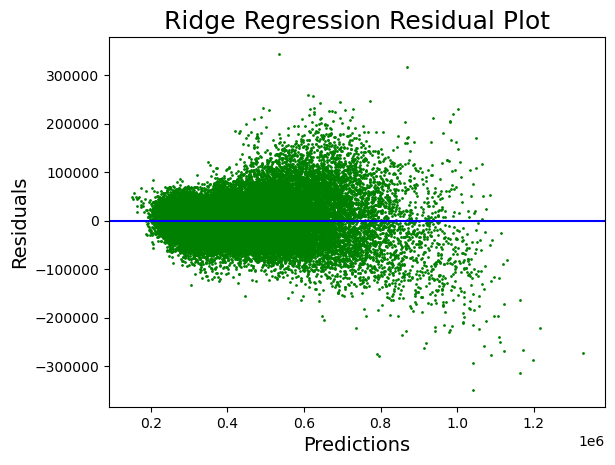

In [48]:
# Residual vs fits plot to detect non-linearity, unequal error variances, and outliers
# Looks fairly linear, variances of error terms are equal but there are outliers 

ridge_residuals = np.exp(y_test) - np.exp(ridge_y_pred)
plt.scatter(np.exp(ridge_y_pred),ridge_residuals, s=1, color='green')
plt.axhline(0, color="blue")
plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.title('Ridge Regression Residual Plot', fontsize=18)
plt.show()

No systematic pattern to the spread of the residuals, which means there linearity assumption was mostly met.

Text(0.5, 1.0, 'Ridge Regression Predictions of Sale Price vs Actual Sale Price')

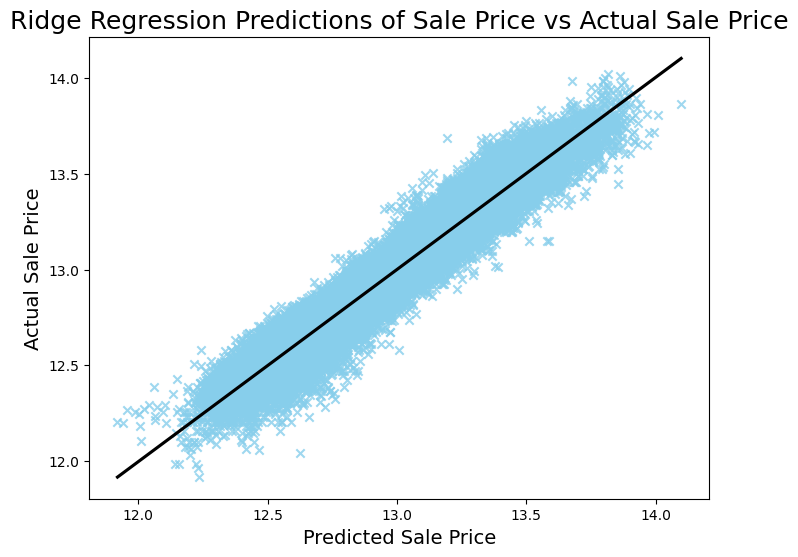

In [49]:
# Create scatterplot to show predicted values versus actual values

plt.figure(figsize=(8,6))
sns.regplot(data=X_train, x=ridge_y_pred, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Ridge Regression Predictions of Sale Price vs Actual Sale Price', fontsize=18)

Text(0.5, 1.0, 'Ridge Regression Predictions of Sale Price vs Actual Sale Price')

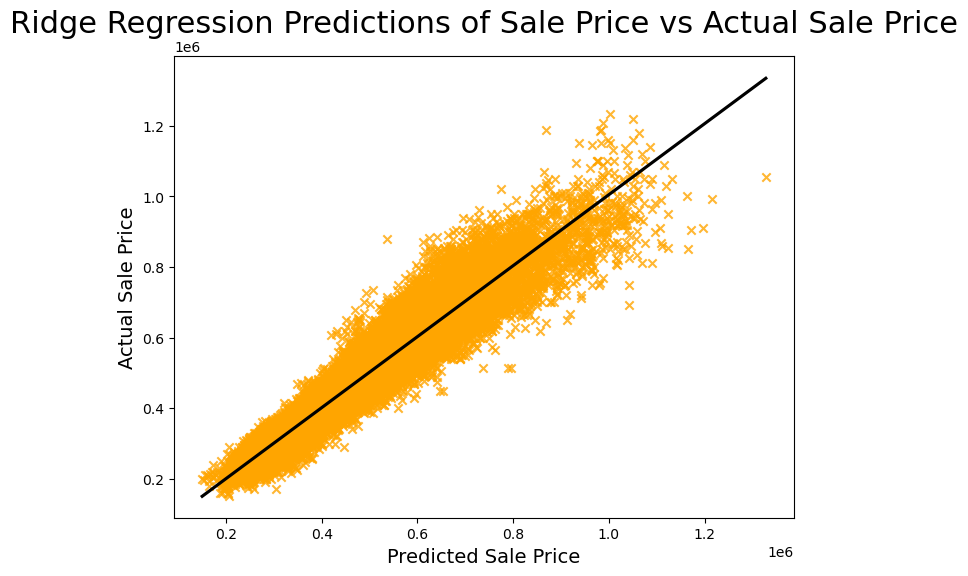

In [50]:
# Create scatterplot to show predicted values versus actual values (not logged)

plt.figure(figsize=(8,6))
sns.regplot(data=X_train, x=np.exp(ridge_y_pred), y=np.exp(y_test), 
            marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Ridge Regression Predictions of Sale Price vs Actual Sale Price', fontsize=22)

There are indications of fanning at the ends of the plot. See if this improves with Lasso regression.

### Lasso Regression

In [51]:
# Using LassoCV to obtain the optimal alpha

optimal_lasso = LassoCV(n_alphas=1000, cv=10)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)

0.00035308645231040936


In [52]:
# Running cross-validation

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print ('Cross-Validation scores:', lasso_scores)
print ('Cross-Validation mean score:', np.mean(lasso_scores))

Cross-Validation scores: [0.90267681 0.90363619 0.90505913 0.90410932 0.90367076 0.90770885
 0.90462932 0.90462369 0.9047557  0.90386318]
Cross-Validation mean score: 0.9044732944419194


In [53]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.00035308645231040936)

In [54]:
print("Training set score:", lasso.score(X_train, y_train))
print("Test set score:", lasso.score(X_test, y_test))

Training set score: 0.9046637107663165
Test set score: 0.9033089634251927


In [55]:
# Obtaining each predictor's coefficient and converting it to show the effect of every unit change

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_),
                            'coef_effect':coef_fx(lasso),
                           })

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(30)

,variable,coef,abs_coef,coef_effect
78,planning_area_Marine Parade,0.381553,0.381553,208661.203109
68,planning_area_Bukit Timah,0.224256,0.224256,112915.150538
0,floor_area_sqft,0.221697,0.221697,111478.868259
92,planning_area_Woodlands,-0.190890,0.190890,-78053.762289
85,planning_area_Sembawang,-0.174712,0.174712,-72001.176920
36,flat_model_DBSS,0.149692,0.149692,72528.938047
83,planning_area_Queenstown,0.141245,0.141245,68140.691644
70,planning_area_Choa Chu Kang,-0.119948,0.119948,-50770.294012
64,planning_area_Bishan,0.119425,0.119425,56975.348403
13,age_at_sale,-0.101458,0.101458,-43335.634596


In [56]:
len(lasso_coefs[lasso_coefs['abs_coef'] == 0])

324

In [57]:
# Predictors that were removed

lasso_coefs[lasso_coefs['abs_coef'] == 0]

,variable,coef,abs_coef,coef_effect
241,pri_sch_name_Telok Kurau Primary School,-0.0,0.0,0.0
239,pri_sch_name_Teck Ghee Primary School,-0.0,0.0,0.0
293,sec_sch_name_Canberra Secondary School,-0.0,0.0,0.0
240,pri_sch_name_Teck Whye Primary School,0.0,0.0,0.0
291,sec_sch_name_CHIJ Saint Theresa's Convent,-0.0,0.0,0.0
290,sec_sch_name_CHIJ Saint Nicholas Girls' School,0.0,0.0,0.0
282,sec_sch_name_Bowen Secondary School,-0.0,0.0,0.0
283,sec_sch_name_Broadrick Secondary School,0.0,0.0,0.0
294,sec_sch_name_Catholic High School,0.0,0.0,0.0
287,sec_sch_name_Bukit View Secondary School,0.0,0.0,0.0


In [58]:
lasso_y_pred = lasso.predict(X_test)
lasso_y_pred

array([12.91491959, 13.18634078, 13.65651793, ..., 12.94264415,
       12.77302305, 12.84702021])

In [59]:
# MAE using log scale

print("Lasso Regression Mean Absolute Error:", mean_absolute_error(np.exp(y_test),np.exp(lasso_y_pred)))

Lasso Regression Mean Absolute Error: 32437.900029961533


In [60]:
# Calculating the RMSE using log scale

print("Lasso Root Mean Squared Error (log scale):", np.sqrt(mean_squared_error(y_test,lasso_y_pred)))

Lasso Root Mean Squared Error (log scale): 0.093826755133086


In [61]:
# Calculating the RMSE using original scale

print("Lasso Root Mean Squared Error:", np.sqrt(mean_squared_error(np.exp(y_test),np.exp(lasso_y_pred))))

Lasso Root Mean Squared Error: 45945.247861212505


In [62]:
# R-Squared

print("R-Squared:", metrics.r2_score(y_test, lasso_y_pred))

R-Squared: 0.9033089634251927


In [63]:
# Comparing predictions against the test set

lasso_predicted = pd.DataFrame({'y_hat':lasso.predict(X_test),
                               'y_actual': y_test,
                               'residuals': (y_test - lasso.predict(X_test)),
                               'actual test values': np.exp(y_test),
                               'predicted values': np.exp(lasso_y_pred).round(decimals = 1)                             
                              })

lasso_predicted.sort_values('residuals', inplace=True, ascending=False)
lasso_predicted

,y_hat,y_actual,residuals,actual test values,predicted values
99144,12.786539,13.648142,0.861603,845888.00,357374.4
106624,12.793626,13.607256,0.813630,812000.00,359915.9
107951,12.744148,13.507626,0.763478,735000.00,342541.5
27147,12.956725,13.697728,0.741002,888888.88,423676.4
53038,12.971050,13.696727,0.725677,888000.00,429789.0
...,...,...,...,...,...
131865,12.621613,12.154779,-0.466833,190000.00,303037.7
120085,12.805638,12.337101,-0.468537,228000.00,364265.5
30464,12.524394,12.055250,-0.469145,172000.00,274963.7
92566,13.632593,13.151922,-0.480671,515000.00,832837.1


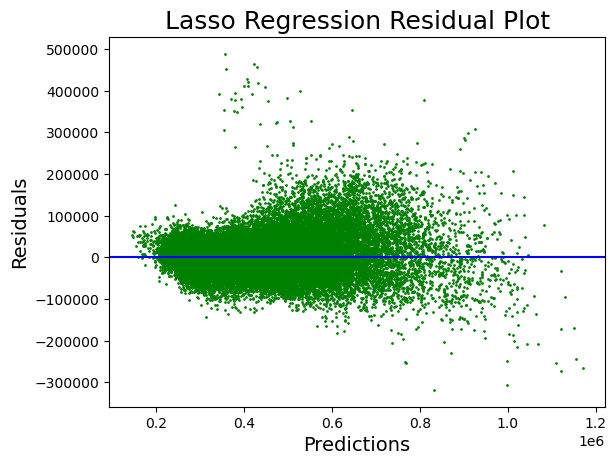

In [64]:
# Residual plot for Homoscedasticity check

lasso_residuals = np.exp(y_test) - np.exp(lasso_y_pred)
plt.scatter(np.exp(lasso_y_pred),lasso_residuals, s=1, color='green')
plt.axhline(0, color="blue")
plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.title('Lasso Regression Residual Plot', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Lasso Predictions of Sale Price vs Actual Sale Price')

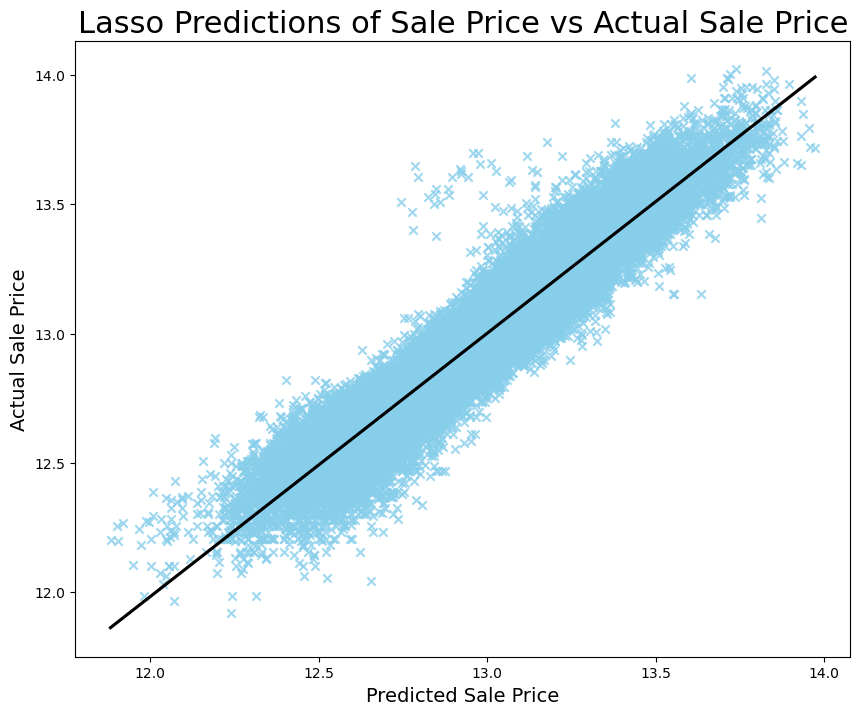

In [65]:
# Create scatterplot to show predicted values versus actual values for linearity check


plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=lasso_y_pred, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Lasso Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Text(0.5, 1.0, 'Lasso Regression Predictions of Sale Price vs Actual Sale Price')

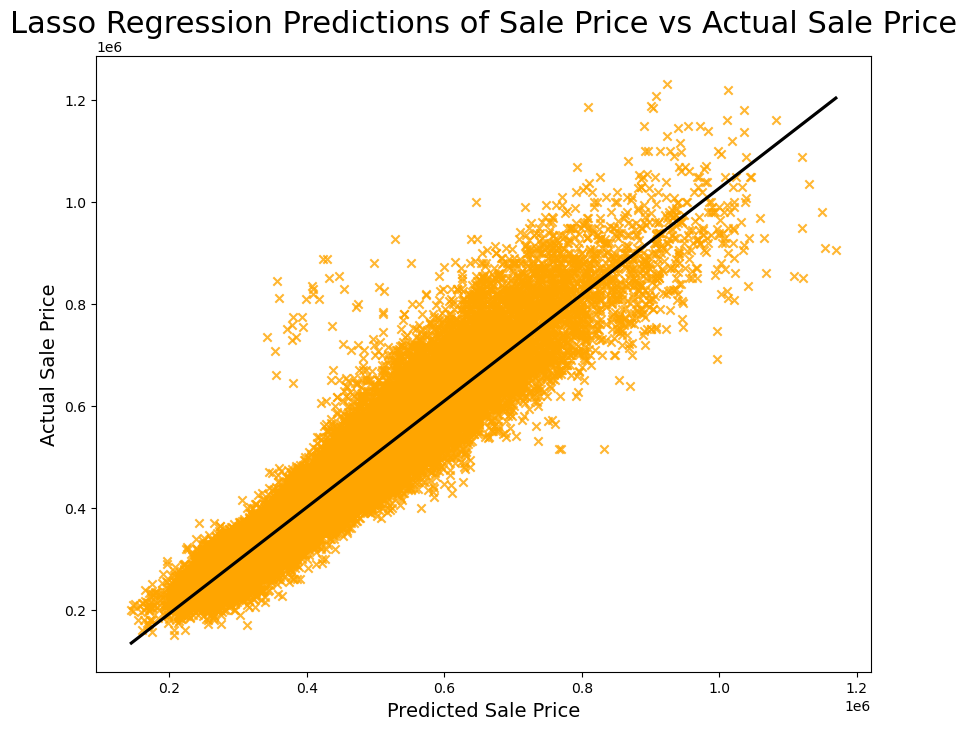

In [66]:
# Create scatterplot to show predicted values versus actual values (tranforming back from log)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=np.exp(lasso_y_pred), y=np.exp(y_test), 
            marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Lasso Regression Predictions of Sale Price vs Actual Sale Price', fontsize=22)

There are indications of fanning at the ends of the plot. Similarly to ridge regression, the constant variance assumption has not been met. 


### ElasticNet

In [67]:
# Finding the optimal alpha and l1 ratio

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=1000, cv=10)
optimal_enet.fit(X_train, y_train)

print (f'Optimal alpha: {optimal_enet.alpha_}')
print (f'Optimal L1 ratio: {optimal_enet.l1_ratio_}')


Optimal alpha: 0.00035308645231040936
Optimal L1 ratio: 1.0


In [68]:
# fitting the model

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

print ("Cross-Validation scores: ", enet_scores)
print ("Cross-Validation mean score: ", np.mean(enet_scores))

Cross-Validation scores:  [0.90267681 0.90363619 0.90505913 0.90410932 0.90367076 0.90770885
 0.90462932 0.90462369 0.9047557  0.90386318]
Cross-Validation mean score:  0.9044732944419194


In [69]:
enet.fit(X_train, y_train)

ElasticNet(alpha=0.00035308645231040936, l1_ratio=1.0)

In [70]:
print("Training set scores: ", enet.score(X_train, y_train))
print("Test set scores: ", enet.score(X_test, y_test))

Training set scores:  0.9046637107663165
Test set scores:  0.9033089634251927


In [71]:
enet_y_pred = enet.predict(X_test)

In [72]:
# MAE 

print("ElasticNet Regression Mean Absolute Error:", mean_absolute_error(np.exp(y_test),np.exp(enet_y_pred)))

ElasticNet Regression Mean Absolute Error: 32437.900029961533


In [73]:
print("ElasticNet Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,enet_y_pred)))

ElasticNet Root Mean Squared Error: 0.093826755133086


In [74]:
# Calculating the RMSE using original scale

print("ElasticNet Root Mean Squared Error:", np.sqrt(mean_squared_error(np.exp(y_test),np.exp(enet_y_pred))))

ElasticNet Root Mean Squared Error: 45945.247861212505


In [75]:
# R-Squared

print("R-Squared:", metrics.r2_score(y_test, enet_y_pred))

R-Squared: 0.9033089634251927


In [76]:
# Predicting on the test set

enet_predicted = pd.DataFrame({'y_hat':enet.predict(X_test),
                               'y_actual': y_test,
                               'residuals': (y_test - enet.predict(X_test)),
                               'actual test values': np.exp(y_test),
                               'predicted values': np.exp(enet_y_pred).round(decimals = 1)                             
                              })

enet_predicted.sort_values('residuals', inplace=True, ascending=False)
enet_predicted.head(10)

,y_hat,y_actual,residuals,actual test values,predicted values
99144,12.786539,13.648142,0.861603,845888.00,357374.4
106624,12.793626,13.607256,0.813630,812000.00,359915.9
107951,12.744148,13.507626,0.763478,735000.00,342541.5
27147,12.956725,13.697728,0.741002,888888.88,423676.4
53038,12.971050,13.696727,0.725677,888000.00,429789.0
137109,12.918368,13.635187,0.716819,835000.00,407733.2
101065,12.848114,13.560618,0.712504,775000.00,380071.4
77618,12.896689,13.604790,0.708100,810000.00,398989.1
72789,12.922172,13.629181,0.707009,830000.00,409287.1
115820,12.823567,13.527828,0.704261,750000.00,370855.2


In [77]:
# Coefficients of predictors

enet_coefs = pd.DataFrame({'variable':X.columns,
                           'enet_coef':enet.coef_,
                           'enet_abs_coef':np.abs(enet.coef_),
                           'coef_effect':coef_fx(enet)})

enet_coefs.sort_values('enet_abs_coef', inplace=True, ascending=False)
enet_coefs.head(30)

,variable,enet_coef,enet_abs_coef,coef_effect
78,planning_area_Marine Parade,0.381553,0.381553,208661.203109
68,planning_area_Bukit Timah,0.224256,0.224256,112915.150538
0,floor_area_sqft,0.221697,0.221697,111478.868259
92,planning_area_Woodlands,-0.190890,0.190890,-78053.762289
85,planning_area_Sembawang,-0.174712,0.174712,-72001.176920
36,flat_model_DBSS,0.149692,0.149692,72528.938047
83,planning_area_Queenstown,0.141245,0.141245,68140.691644
70,planning_area_Choa Chu Kang,-0.119948,0.119948,-50770.294012
64,planning_area_Bishan,0.119425,0.119425,56975.348403
13,age_at_sale,-0.101458,0.101458,-43335.634596


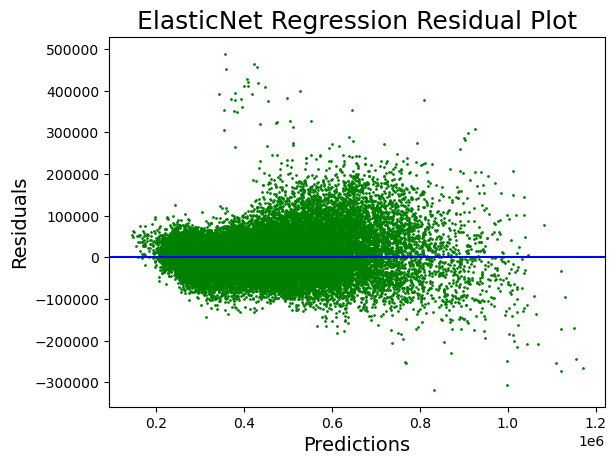

In [78]:
# Residual vs fits plot to detect non-linearity, unequal error variances, and outliers
# Looks the same as Lasso

enet_residuals = np.exp(y_test) - np.exp(enet_y_pred)
plt.scatter(np.exp(enet_y_pred),enet_residuals, s=1, color='green')
plt.axhline(0, color="blue")
plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.title('ElasticNet Regression Residual Plot', fontsize=18)
plt.show()

There are no obvious patterns. The linearity assumption is more or less met.

There are indications of fanning at the ends of the plot. The constant variance assumption has not been met.
Similar to the earlier models, we'll need to handle outliers more deliberately in future iterations. 

Text(0.5, 1.0, 'ElasticNet Predictions of Sale Price vs Actual Sale Price')

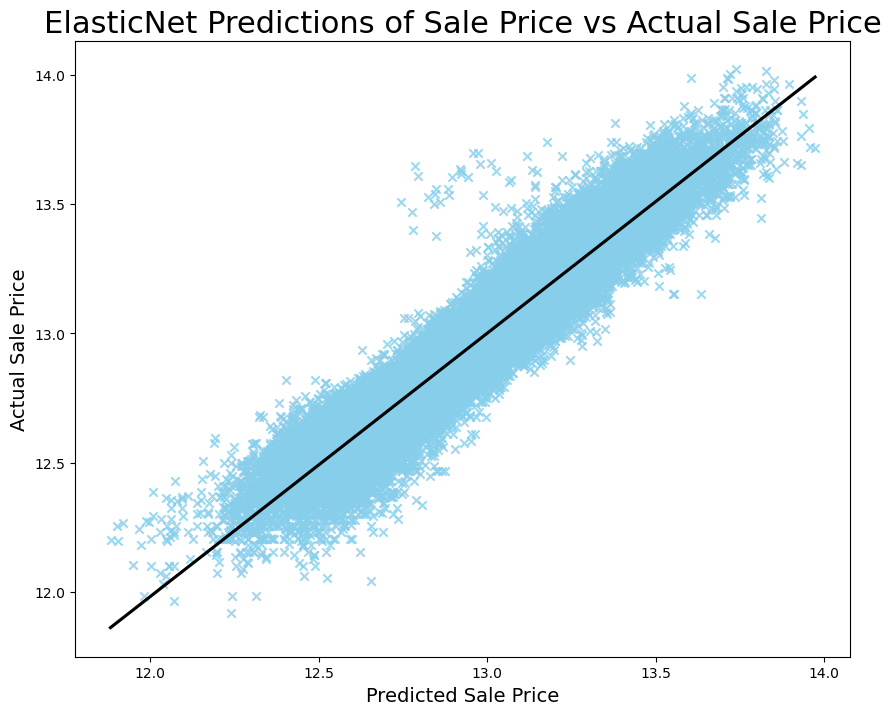

In [79]:
# Create scatterplot to show predicted values versus actual values  for linearity check

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=enet_y_pred, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('ElasticNet Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Text(0.5, 1.0, 'ElasticNet Regression Predictions of Sale Price vs Actual Sale Price')

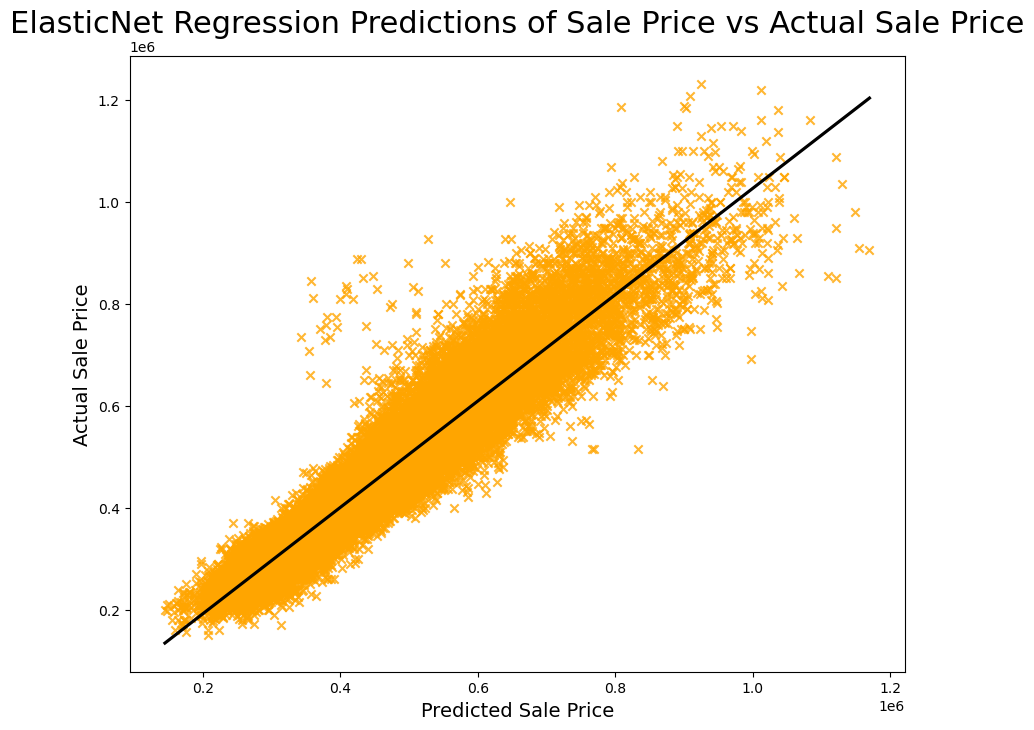

In [80]:
# Create scatterplot to show predicted values versus actual values (not logged)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train, x=np.exp(enet_y_pred), y=np.exp(y_test), 
            marker='x', color='orange', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('ElasticNet Regression Predictions of Sale Price vs Actual Sale Price', fontsize=22)

---

## 3. Review of Models

**Comparison of results against baseline RMSE of 143239**:


| Model  	|  Presence of overfitting / underfitting 	| Root Mean Squared Error (RMSE)  	|  Mean Absolute Error (MAE) 	|   R-Squared Scores 	| Remarks  	|
|---	|---	|---	|---	|---	|---	|
| Linear Regression  	| No  	| 40522  	| 28959  	| 0.926  	| Inflated coefficients, most of which had p-values > 0.05   	|
|  Ridge Regression 	| No  	| 40485  	| 28922  	| 0.925  	| An improvement over linear regression with a lower MAE and no overfitting 	|
| Lasso Regression  	| No  	| 45945  	| 32437  	| 0.903  	| Performs a bit worse than Ridge regression, despite automated feature selection  	|
|  ElasticNet Regression 	| No  	| 45945  	| 32437  	| 0.903  	| Similar performance to Lasso regression  	|


- While the linear regression model outperformed the baseline mean score in terms of having a lower RMSE, it was overfitted based on the cross-validation scores.
- Ridge regression was the best model after L2 regularization of the large number of features, with minimal overfitting and the lowest RMSE score. It seems like automated feature selection under the Lasso and ElasticNet models did not lead to improved results even after 324 lower-performing features' coefficients have been shrunk to zero. 
- While the removal of certain features seems to enable better interpretability of the range of factors that predict resale prices, we'll use the Ridge regression model as our production model given that it performs the best at predicting housing resale prices with the lowest amount of error, which best addresses our business objective.


-----

## 4. Production Model: Cleaning and feature engineering of the test data

In [81]:
# Set max views for columns and rows for ease of EDA

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('mode.chained_assignment', None)

In [82]:
test_df = pd.read_csv('../datasets/test.csv', low_memory=False)
test_df.shape

(16737, 77)

In [83]:
#saving original test set 

test_df1 = test_df

In [84]:
test_df.drop('price_per_sqft', inplace = True, axis = 1)

In [85]:
test_df.isnull().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units             0
1room_sold          

In [86]:
# Imputing missing values with 2000

test_df['Mall_Nearest_Distance'].fillna(2000, inplace = True)

In [87]:
# Imputing missing values with 0

cols = ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 
        'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']

result = [test_df[col].fillna(0, inplace = True) for col in cols]

In [88]:
# Taking Tanjong Pagar as proxy for CBD

test_df['CBD_latitude'] = [1.275619 for x in test_df['Latitude']]
test_df['CBD_longitude'] = [103.842431 for x in test_df['Longitude']]

In [89]:
# Formula for straight line distance based on latitude and longitude

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [90]:
# Creating a new column for distance from CBD

test_df['distance_from_CBD'] = haversine_np(test_df['Latitude'],test_df['Longitude'],test_df['CBD_latitude'],test_df['CBD_longitude'])

In [91]:
test_df['1_2_3_rooms_sold'] = test_df['1room_sold'] + test_df['2room_sold'] + test_df['3room_sold']
test_df['4_5_other_rooms_sold'] = test_df['4room_sold'] + test_df['5room_sold'] + test_df['exec_sold'] + test_df['multigen_sold'] + test_df['studio_apartment_sold']

In [92]:
# replace all storey-related variables with mid-storey as the estimated median height  

test_df['est_floor_level'] = test_df['mid_storey']  

In [93]:
# Creating a new variable to estimate the unit's age at the point of transaction 

test_df['age_at_sale'] = test_df['Tranc_Year'] - test_df['lease_commence_date']

In [94]:
# Dropping all variables for reasons mentioned under EDA and cleaning 

test_df.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude',
                        'pri_sch_longitude','sec_sch_longitude','sec_sch_latitude','postal',
                        'CBD_latitude','CBD_longitude','Mall_Within_500m', 'Hawker_Within_500m', 
                        'Mall_Within_1km', 'Hawker_Within_1km','mrt_interchange',
                        'affiliation', 'pri_sch_affiliation', '1room_rental','2room_rental', 
                        'floor_area_sqm','3room_rental', 'other_room_rental', '1room_sold', 
                        '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold','total_dwelling_units', 
                        'storey_range', 'lower','upper', 'mid','mid_storey','max_floor_lvl',
                        'bus_interchange','hdb_age','year_completed','Tranc_YearMonth',
                        'lease_commence_date', 'residential','market_hawker','multistorey_carpark',
                        'full_flat_type', 'Tranc_Month','precinct_pavilion','cutoff_point', 
                        'vacancy', 'town', 'street_name', 'block', 'address', 
                        'mrt_name','bus_stop_name','Hawker_Nearest_Distance', 'hawker_market_stalls'],
             inplace = True)

In [95]:
# To log all variables with large scales, but first replace 0 with 0.01 since log(0) is undefined. 

cols2 = ['Mall_Nearest_Distance', 'Mall_Within_2km', 'Hawker_Within_2km', 
         'hawker_food_stalls', '1_2_3_rooms_sold', '4_5_other_rooms_sold']

result = [test_df[col].replace({0:1}, inplace = True) for col in cols2]


In [96]:
test_df.head()

,id,flat_type,flat_model,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,sec_sch_nearest_dist,sec_sch_name,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,114982,4 ROOM,Simplified,2012,904.176,Y,Yishun,877.431572,4.0,1.0,56,686.660434,75.683952,426.467910,Ahmad Ibrahim Primary School,156.322353,Ahmad Ibrahim Secondary School,4.470969,1,132,8,25
1,95653,5 ROOM,Premium Apartment,2019,1205.568,N,Jurong West,534.037705,3.0,1.0,72,169.478175,88.993058,439.756851,Jurong West Primary School,739.371688,Jurong West Secondary School,16.389521,1,53,5,11
2,40303,3 ROOM,New Generation,2013,731.952,N,Ang Mo Kio,817.050453,3.0,11.0,50,694.220448,86.303575,355.882207,Jing Shan Primary School,305.071191,Anderson Secondary School,2.925177,191,24,8,33
3,109506,4 ROOM,New Generation,2017,1044.108,N,Woodlands,1272.737194,3.0,2.0,52,1117.203587,108.459039,929.744711,Marsiling Primary School,433.454591,Woodlands Secondary School,8.905655,1,104,2,38
4,100149,4 ROOM,Model A,2016,1108.692,N,Bukit Batok,1070.963675,5.0,2.0,60,987.976010,113.645431,309.926934,Princess Elizabeth Primary School,217.295361,Bukit Batok Secondary School,11.525598,1,144,17,31


In [97]:
# Converting the following variables to categorical 

test_df['Tranc_Year'] = test_df['Tranc_Year'].astype('object')

In [98]:
test_df_num = test_df.select_dtypes("number")
test_df_num.drop('id', axis = 1, inplace = True)
test_df_num.head()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,904.176,877.431572,4.0,1.0,56,686.660434,75.683952,426.467910,156.322353,4.470969,1,132,8,25
1,1205.568,534.037705,3.0,1.0,72,169.478175,88.993058,439.756851,739.371688,16.389521,1,53,5,11
2,731.952,817.050453,3.0,11.0,50,694.220448,86.303575,355.882207,305.071191,2.925177,191,24,8,33
3,1044.108,1272.737194,3.0,2.0,52,1117.203587,108.459039,929.744711,433.454591,8.905655,1,104,2,38
4,1108.692,1070.963675,5.0,2.0,60,987.976010,113.645431,309.926934,217.295361,11.525598,1,144,17,31


In [99]:
# Log transforming numerical variables

test_df[test_df_num.columns] = np.log(test_df_num)

In [100]:
test_df.head()

,id,flat_type,flat_model,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,sec_sch_nearest_dist,sec_sch_name,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,114982,4 ROOM,Simplified,2012,6.807024,Y,Yishun,6.776999,1.386294,0.000000,4.025352,6.531840,4.326566,6.055537,Ahmad Ibrahim Primary School,5.051920,Ahmad Ibrahim Secondary School,1.497605,0.000000,4.882802,2.079442,3.218876
1,95653,5 ROOM,Premium Apartment,2019,7.094706,N,Jurong West,6.280466,1.098612,0.000000,4.276666,5.132724,4.488558,6.086222,Jurong West Primary School,6.605801,Jurong West Secondary School,2.796642,0.000000,3.970292,1.609438,2.397895
2,40303,3 ROOM,New Generation,2013,6.595715,N,Ang Mo Kio,6.705701,1.098612,2.397895,3.912023,6.542790,4.457871,5.874600,Jing Shan Primary School,5.720545,Anderson Secondary School,1.073355,5.252273,3.178054,2.079442,3.496508
3,109506,4 ROOM,New Generation,2017,6.950918,N,Woodlands,7.148925,1.098612,0.693147,3.951244,7.018584,4.686373,6.834910,Marsiling Primary School,6.071787,Woodlands Secondary School,2.186687,0.000000,4.644391,0.693147,3.637586
4,100149,4 ROOM,Model A,2016,7.010936,N,Bukit Batok,6.976314,1.609438,0.693147,4.094345,6.895658,4.733083,5.736337,Princess Elizabeth Primary School,5.381258,Bukit Batok Secondary School,2.444571,0.000000,4.969813,2.833213,3.433987


In [101]:
test_df.shape

(16737, 22)

In [102]:
# extracting id column

id_no = test_df['id']
test_df2 = test_df.drop('id', axis = 1)

In [103]:
# Standardising predictors

ss = StandardScaler()
num_ss = ss.fit_transform(test_df_num)
num_ss = pd.DataFrame(num_ss, columns = test_df_num.columns)

In [104]:
num_ss.shape

(16737, 14)

In [105]:
# Identifying categorical predictors for one-hot encoding

categorical_var = test_df2.select_dtypes(include=['object'])
categorical_var

,flat_type,flat_model,Tranc_Year,commercial,planning_area,pri_sch_name,sec_sch_name
0,4 ROOM,Simplified,2012,Y,Yishun,Ahmad Ibrahim Primary School,Ahmad Ibrahim Secondary School
1,5 ROOM,Premium Apartment,2019,N,Jurong West,Jurong West Primary School,Jurong West Secondary School
2,3 ROOM,New Generation,2013,N,Ang Mo Kio,Jing Shan Primary School,Anderson Secondary School
3,4 ROOM,New Generation,2017,N,Woodlands,Marsiling Primary School,Woodlands Secondary School
4,4 ROOM,Model A,2016,N,Bukit Batok,Princess Elizabeth Primary School,Bukit Batok Secondary School
...,...,...,...,...,...,...,...
16732,3 ROOM,New Generation,2016,N,Ang Mo Kio,Mayflower Primary School,Yio Chu Kang Secondary School
16733,4 ROOM,Premium Apartment,2017,N,Punggol,Punggol View Primary School,Punggol Secondary School
16734,5 ROOM,Improved,2018,N,Choa Chu Kang,Unity Primary School,Unity Secondary School
16735,4 ROOM,Simplified,2020,N,Bishan,Kuo Chuan Presbyterian Primary School,Kuo Chuan Presbyterian Secondary School


In [106]:
categorical_var.shape

(16737, 7)

In [107]:
# Dummifying all categorical variables

categorical_var = pd.get_dummies(columns=categorical_var.columns, data=test_df2, drop_first=True)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_25568/3112809898.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  categorical_var = pd.get_dummies(columns=categorical_var.columns, data=test_df2, drop_first=True)


In [108]:
categorical_var.shape

(16737, 387)

In [109]:
categorical_var.head()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,Tranc_Year_2013,Tranc_Year_2014,Tranc_Year_2015,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,commercial_Y,planning_area_Bedok,planning_area_Bishan,...,sec_sch_name_Pasir Ris Secondary School,sec_sch_name_Paya Lebar Methodist Girls' School,sec_sch_name_Pei Hwa Secondary School,sec_sch_name_Peicai Secondary School,sec_sch_name_Peirce Secondary School,sec_sch_name_Ping Yi Secondary School,sec_sch_name_Presbyterian High School,sec_sch_name_Punggol Secondary School,sec_sch_name_Queenstown Secondary School,sec_sch_name_Queensway Secondary School,sec_sch_name_Raffles Girls' School,sec_sch_name_Raffles Institution,sec_sch_name_Regent Secondary School,sec_sch_name_River Valley High School,sec_sch_name_Riverside Secondary School,sec_sch_name_Saint Andrew's Secondary School,sec_sch_name_Saint Anthony's Canossian Secondary School,sec_sch_name_Saint Gabriel's Secondary School,sec_sch_name_Saint Hilda's Secondary School,sec_sch_name_Saint Margaret's Secondary School,sec_sch_name_Saint Patrick's School,sec_sch_name_Sembawang Secondary School,sec_sch_name_Seng Kang Secondary School,sec_sch_name_Serangoon Garden Secondary School,sec_sch_name_Serangoon Secondary School,sec_sch_name_Springfield Secondary School,sec_sch_name_Swiss Cottage Secondary School,sec_sch_name_Tampines Secondary School,sec_sch_name_Tanglin Secondary School,sec_sch_name_Tanjong Katong Secondary School,sec_sch_name_Teck Whye Secondary School,sec_sch_name_Temasek Junior College,sec_sch_name_Temasek Secondary School,sec_sch_name_Unity Secondary School,sec_sch_name_West Spring Secondary School,sec_sch_name_Westwood Secondary School,sec_sch_name_Whitley Secondary School,sec_sch_name_Woodgrove Secondary School,sec_sch_name_Woodlands Ring Secondary School,sec_sch_name_Woodlands Secondary School,sec_sch_name_Xinmin Secondary School,sec_sch_name_Yio Chu Kang Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Yuan Ching Secondary School,sec_sch_name_Yuhua Secondary School,sec_sch_name_Yusof Ishak Secondary School,sec_sch_name_Yuying Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_Zhonghua Secondary School
0,6.807024,6.776999,1.386294,0.000000,4.025352,6.531840,4.326566,6.055537,5.051920,1.497605,0.000000,4.882802,2.079442,3.218876,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.094706,6.280466,1.098612,0.000000,4.276666,5.132724,4.488558,6.086222,6.605801,2.796642,0.000000,3.970292,1.609438,2.397895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.595715,6.705701,1.098612,2.397895,3.912023,6.542790,4.457871,5.874600,5.720545,1.073355,5.252273,3.178054,2.079442,3.496508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.950918,7.148925,1.098612,0.693147,3.951244,7.018584,4.68637

In [110]:
test_df3 = pd.concat([num_ss.reset_index() , categorical_var.reset_index() ], axis=1)

In [111]:
test_df3.drop(columns = 'index', inplace = True)

In [112]:
# final dataset for production model

test_df3.shape

(16737, 401)

In [113]:
test_df3.head()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,...,sec_sch_name_Pasir Ris Secondary School,sec_sch_name_Paya Lebar Methodist Girls' School,sec_sch_name_Pei Hwa Secondary School,sec_sch_name_Peicai Secondary School,sec_sch_name_Peirce Secondary School,sec_sch_name_Ping Yi Secondary School,sec_sch_name_Presbyterian High School,sec_sch_name_Punggol Secondary School,sec_sch_name_Queenstown Secondary School,sec_sch_name_Queensway Secondary School,sec_sch_name_Raffles Girls' School,sec_sch_name_Raffles Institution,sec_sch_name_Regent Secondary School,sec_sch_name_River Valley High School,sec_sch_name_Riverside Secondary School,sec_sch_name_Saint Andrew's Secondary School,sec_sch_name_Saint Anthony's Canossian Secondary School,sec_sch_name_Saint Gabriel's Secondary School,sec_sch_name_Saint Hilda's Secondary School,sec_sch_name_Saint Margaret's Secondary School,sec_sch_name_Saint Patrick's School,sec_sch_name_Sembawang Secondary School,sec_sch_name_Seng Kang Secondary School,sec_sch_name_Serangoon Garden Secondary School,sec_sch_name_Serangoon Secondary School,sec_sch_name_Springfield Secondary School,sec_sch_name_Swiss Cottage Secondary School,sec_sch_name_Tampines Secondary School,sec_sch_name_Tanglin Secondary School,sec_sch_name_Tanjong Katong Secondary School,sec_sch_name_Teck Whye Secondary School,sec_sch_name_Temasek Junior College,sec_sch_name_Temasek Secondary School,sec_sch_name_Unity Secondary School,sec_sch_name_West Spring Secondary School,sec_sch_name_Westwood Secondary School,sec_sch_name_Whitley Secondary School,sec_sch_name_Woodgrove Secondary School,sec_sch_name_Woodlands Ring Secondary School,sec_sch_name_Woodlands Secondary School,sec_sch_name_Xinmin Secondary School,sec_sch_name_Yio Chu Kang Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Yuan Ching Secondary School,sec_sch_name_Yuhua Secondary School,sec_sch_name_Yusof Ishak Secondary School,sec_sch_name_Yuying Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_Zhonghua Secondary School
0,-0.528647,0.552950,-0.341416,-0.780980,0.395883,-0.185970,-0.701223,0.133777,-1.133939,-0.784210,-0.582759,0.948722,-0.050219,0.073582,6.807024,6.776999,1.386294,0.000000,4.025352,6.531840,4.326566,6.055537,5.051920,1.497605,0.000000,4.882802,2.079442,3.218876,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.616688,-0.354635,-0.631997,-0.780980,1.242813,-1.386416,-0.462356,0.190487,0.730336,2.292922,-0.582759,-0.573277,-0.595299,-1.098841,7.094706,6.280466,1.098612,0.000000,4.276666,5.132724,4.488558,6.086222,6.605801,2.796642,0.000000,3.970292,1.609438,2.397895,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.183124,0.393364,-0.631997,1.794181,0.078285,-0.168422,-0.510625,-0.167447,-0.658321,-1.183302,2.118012,-1.131985,-0.

## 5. Predicting on Production Model

In [114]:
test_df3.shape[0]

16737

In [115]:
# Refit model on entire training dataset and removing columns that aren't found in the test set

ridge = RidgeCV()
X.drop(columns = ["flat_model_Adjoined flat","pri_sch_name_Saint Gabriel's Primary School"], inplace = True)

In [116]:
# Fitting the model and obtaining the R-squared

ridge.fit(X, y)
ridge.score(X, y)

0.9263341409533585

In [117]:
# Predicting using ridge

y_pred_pdtn = ridge.predict(test_df3)
y_pred_pdtn

array([12.83939825, 13.05718858, 12.81689097, ..., 12.85254767,
       13.07884194, 12.86306699])

In [118]:
# Obtaining list of predicted values

ridge_predicted = pd.DataFrame({'id': id_no,
                                'raw_predictions':y_pred_pdtn,
                                'Predicted': np.exp(y_pred_pdtn).round(decimals = 1)
                               })
ridge_predicted


,id,raw_predictions,Predicted
0,114982,12.839398,376773.0
1,95653,13.057189,468451.8
2,40303,12.816891,368387.6
3,109506,12.620828,302800.1
4,100149,12.924110,410081.1
...,...,...,...
16732,23347,12.730880,338026.7
16733,54003,13.057567,468629.3
16734,128921,12.852548,381760.1
16735,69352,13.078842,478706.0


In [119]:
# Obtaining the full dataset 

full_dataset = ridge_predicted.merge(test_df, on = 'id', how = 'left')
full_dataset.head()

,id,raw_predictions,Predicted,flat_type,flat_model,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Within_2km,hawker_food_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,sec_sch_nearest_dist,sec_sch_name,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
0,114982,12.839398,376773.0,4 ROOM,Simplified,2012,6.807024,Y,Yishun,6.776999,1.386294,0.000000,4.025352,6.531840,4.326566,6.055537,Ahmad Ibrahim Primary School,5.051920,Ahmad Ibrahim Secondary School,1.497605,0.000000,4.882802,2.079442,3.218876
1,95653,13.057189,468451.8,5 ROOM,Premium Apartment,2019,7.094706,N,Jurong West,6.280466,1.098612,0.000000,4.276666,5.132724,4.488558,6.086222,Jurong West Primary School,6.605801,Jurong West Secondary School,2.796642,0.000000,3.970292,1.609438,2.397895
2,40303,12.816891,368387.6,3 ROOM,New Generation,2013,6.595715,N,Ang Mo Kio,6.705701,1.098612,2.397895,3.912023,6.542790,4.457871,5.874600,Jing Shan Primary School,5.720545,Anderson Secondary School,1.073355,5.252273,3.178054,2.079442,3.496508
3,109506,12.620828,302800.1,4 ROOM,New Generation,2017,6.950918,N,Woodlands,7.148925,1.098612,0.693147,3.951244,7.018584,4.686373,6.834910,Marsiling Primary School,6.071787,Woodlands Secondary School,2.186687,0.000000,4.644391,0.693147,3.637586
4,100149,12.924110,410081.1,4 ROOM,Model A,2016,7.010936,N,Bukit Batok,6.976314,1.609438,0.693147,4.094345,6.895658,4.733083,5.736337,Princess Elizabeth Primary School,5.381258,Bukit Batok Secondary School,2.444571,0.000000,4.969813,2.833213,3.433987


In [120]:
# Function for getting dollar increase in resale price for 1 unit change in predictor 

def coef_fx(model):
    transformed_coef = []
    for i in model.coef_:
        j = math.exp(i)
        transformed_coef.append(j)
        coef_effect = [(i-1)*full_dataset['Predicted'].mean() for i in transformed_coef]
    return coef_effect

In [121]:
# Summarising coefficients

ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_),
                            'coef_effect':coef_fx(ridge),
                           })

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
ridge_coefs.head(30)

,variable,coef,abs_coef,coef_effect
49,flat_model_Terrace,0.628013,0.628013,392114.849009
91,planning_area_Woodlands,-0.285234,0.285234,-111350.909792
286,sec_sch_name_CHIJ Katong Convent,0.277815,0.277815,143693.470256
108,pri_sch_name_CHIJ Our Lady Queen of Peace,0.271275,0.271275,139831.804216
236,pri_sch_name_Tao Nan School,0.269031,0.269031,138513.078764
68,planning_area_Changi,0.265541,0.265541,136466.826192
186,pri_sch_name_Ngee Ann Primary School,0.233583,0.233583,118061.728982
371,sec_sch_name_Saint Patrick's School,0.224800,0.224800,113105.481868
223,pri_sch_name_Saint Joseph's Institution Junior,0.222375,0.222375,111744.872016
233,pri_sch_name_Stamford Primary School,0.204196,0.204196,101648.531073


In [122]:
# Looking at predicted median resale prices by planning area

full_dataset.groupby('planning_area')['Predicted'].median().sort_values(ascending = False)

planning_area
Bukit Timah                717603.10
Downtown Core              596620.85
Bishan                     585274.05
Outram                     568424.20
Bukit Merah                564341.90
Tanglin                    563080.40
Pasir Ris                  489516.60
Marine Parade              465148.70
Serangoon                  464074.60
Tampines                   458046.10
Punggol                    455696.70
Sengkang                   445965.60
Rochor                     428679.60
Queenstown                 426681.80
Kallang                    425287.10
Bukit Panjang              423540.25
Novena                     420000.20
Hougang                    418994.80
Clementi                   416322.30
Choa Chu Kang              405520.30
Sembawang                  403036.20
Jurong West                399190.30
Woodlands                  395847.75
Jurong East                390690.40
Geylang                    380415.10
Bukit Batok                376888.60
Bedok                   

In [123]:
# Save as csv file 
full_dataset.to_csv('../datasets/production-model-ridge.csv') 

## 6. Conclusions & Business Recommendations

**Conclusion and Recommendations**

The top predictive features for resale price relate to flat models, planning area and primary school names. 

Flat models that are larger in size such as terraces and maisonettes are related to higher resale prices. 

The finding that neighbourhood and proximity to good primary schools are top predicts corresponds with external research, as these are often key considerations Singapore families have when deciding on where to purchase a flat. Neighbourhoods that are further away from the city centre such as Changi (median price SGD 257K) and Choa Chu Kang (median price SGD 405K) come with lower housing resale prices while homes located right at the CBD (Downtown Core) command higher prices, which could also be due to its proximity to workplaces. Homes in areas such as Bukit Timah - close to top schools and amenities - fetch higher prices as well with a median resale price of SGD 718K.   

Proximity to well-known primary schools and those with affiliation to popular secondary schools (such as CHIJ, Tao Nan, Ngee Ann and St Patricks) are strong positive predictors of resale price. 

Unit size is also a strong predictor where the larger the unit, the higher the resale price. 

PropertyGuru should include the following variables in their interactive game for predicting housing prices:
- full range of neighbourhoods in Singapore
- a search field for primary schools nearby
- flat model 
- unit size

<br>

**Future Steps**

For future models, I would: 
- Use ensemble methods or boosting to achieve higher performance through learning from the shortcomings of earlier model iterations. A single regression model seems inadequate for predicting housing prices, given the high amount of error and need to fulfill linear regression assumptions.
- Consider analysing the outliers for resale price using a separate model as the factors predicting the prices for those homes may differ from a typical housing unit in Singapore. 
- If the data is available, it may be useful to merge the dataset with information on the purchasers' family size, demographic profile and income range, which can add more information and aid with model interpretation. 


### Exporting dataset for Kaggle

In [124]:
kaggle = full_dataset[['id', 'Predicted']].set_index('id')

In [125]:
kaggle.to_csv('../datasets/kaggle.csv')  

Results:

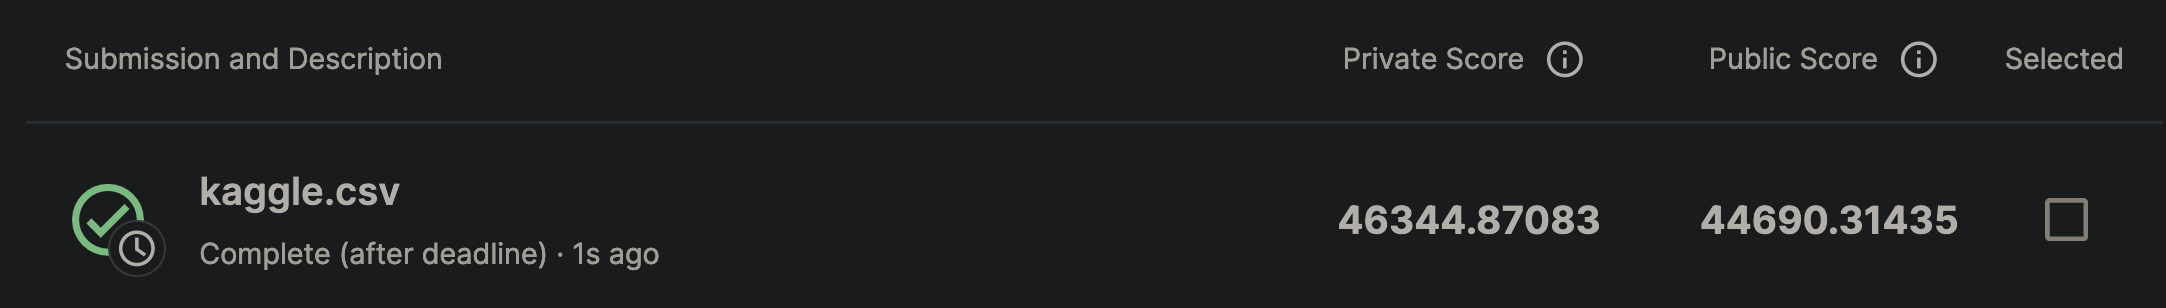